In [470]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import confusion_matrix



In [471]:
train_file = pd.read_csv('train_file_clean.csv')

In [472]:
train_file.columns

Index(['Unnamed: 0', 'Tour_ID', 'country', 'age_group', 'travel_with',
       'total_female', 'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category', 'total_packages',
       'total_people', 'total_days', 'continent'],
      dtype='object')

In [473]:
train_file.drop(columns=['Unnamed: 0', 'country'], axis=0, inplace=True)

In [474]:
train_file.set_index('Tour_ID', inplace = True)

In [475]:
train_file['cost_category'].replace({1 : 'Lower Cost', 
                    2 : 'Low Cost', 
                    3 : 'Normal Cost', 
                    4 : 'High Cost', 
                    5 : 'Higher Cost', 
                    6 : 'Highest Cost'}, inplace=True)

In [476]:
train_file['total_female']= train_file['total_female'].dropna() 

In [477]:
train_file['total_male']= train_file['total_male'].dropna() 

In [478]:
train_file = train_file.dropna() 

In [479]:
tf_dummy = pd.get_dummies(train_file, columns = ['age_group', 'travel_with', 'purpose', 
                                             'main_activity', 'info_source', 
                                                 'tour_arrangement', 'continent'])

In [480]:
train_file.drop(columns = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'continent', 'cost_category'], axis = 1, inplace = True)

In [481]:
train_file = pd.concat([train_file, tf_dummy], axis=1)

In [482]:
cols = train_file.columns.tolist()

In [483]:
cols = cols.remove('cost_category')

In [484]:
X = train_file.loc[:, train_file.columns != 'cost_category']


In [548]:
y = train_file['cost_category']

In [486]:
y

Tour_ID
tour_id1hffseyw      High Cost
tour_idnacd7zag      High Cost
tour_id62vz7e71    Higher Cost
tour_idrc76tzix     Lower Cost
tour_idn723m0n9    Higher Cost
                      ...     
tour_idmp5ciw50     Lower Cost
tour_ideq0yncfs     Lower Cost
tour_idv7pz3vs8    Higher Cost
tour_idy6ydo00w    Higher Cost
tour_idceoq9por       Low Cost
Name: cost_category, Length: 18478, dtype: object

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [488]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000).fit(X_train, y_train)

In [489]:
y_pred = model.predict(X_test)

In [490]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.553030303030303

In [491]:
model.predict_proba(X_test)

array([[2.02746890e-01, 3.20104701e-01, 2.17654183e-03, 4.65945231e-02,
        2.04052797e-02, 4.07972064e-01],
       [2.36053992e-01, 3.19847447e-01, 2.28715449e-03, 3.69437564e-02,
        4.52645133e-03, 4.00341199e-01],
       [1.69485333e-02, 3.53558727e-03, 9.30935164e-05, 2.50484952e-01,
        4.21119501e-01, 3.07818333e-01],
       ...,
       [1.11411787e-01, 3.35735091e-02, 6.52604901e-04, 1.21559343e-01,
        9.63641311e-02, 6.36438625e-01],
       [2.55061099e-01, 4.38758874e-01, 1.98348705e-01, 8.12804433e-03,
        4.45916133e-03, 9.52441157e-02],
       [1.40398126e-01, 4.57262820e-02, 7.01945692e-04, 1.17447064e-01,
        1.79309715e-01, 5.16416868e-01]])

# PCA test

In [493]:
train_file.replace({'Lower Cost' : 1, 
                    'Low Cost' : 2, 
                    'Normal Cost' : 3, 
                    'High Cost' : 4, 
                    'Higher Cost' : 5, 
                    'Highest Cost' : 6}, inplace=True)

In [494]:
scaler = StandardScaler()

In [495]:
train_file = pd.DataFrame(scaler.fit_transform(train_file), columns=train_file.columns)

In [497]:
train_file.shape

(18478, 76)

In [498]:
pca = PCA()

In [499]:
pc_scores = pca.fit_transform(train_file)

In [501]:
PC_NUMBERS = np.arange(1, train_file.shape[1]+1)
PC_LABELS = ['PC'+str(i) for i in np.arange(1,train_file.shape[1]+1)]

In [502]:
loadings = pd.DataFrame(pca.components_, columns=train_file.columns, index=PC_LABELS)

In [503]:
pca.explained_variance_ratio_[0:40].sum()

0.9283435990628415

In [504]:
variance_explained = pd.DataFrame(
    {
        'PC': PC_NUMBERS,
        'Proportion': pca.explained_variance_ratio_
    }
)
variance_explained["Cumulative"] = variance_explained.Proportion.cumsum()

Text(0.5, 1.0, 'Scree Plot')

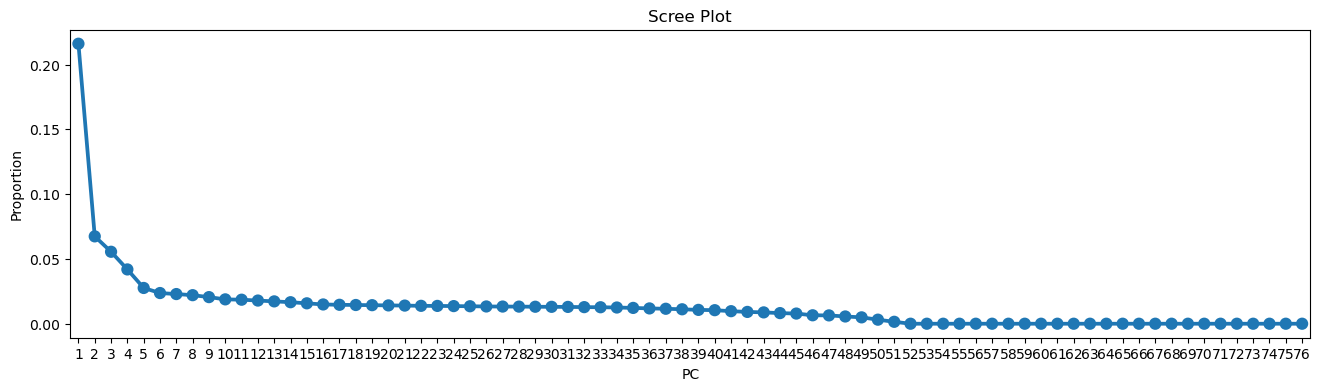

In [505]:
plt.figure(figsize=(16, 4))
sns.pointplot(
    x="PC", y="Proportion",
    data=variance_explained
).set_title('Scree Plot')

In [506]:
pc_scores = pd.DataFrame(pc_scores, columns=PC_LABELS)
pc_scores.shape

(18478, 76)

In [507]:
t = pc_scores.iloc[:, :6]
t.shape

(18478, 6)

In [508]:
X_train, X_test, y_train, y_test = train_test_split(t, y, train_size=0.7, random_state = 42)

In [509]:
y_train = y_train.astype('int', copy=True)

In [510]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [511]:
lab = preprocessing.LabelEncoder()
y_test_transformed = lab.fit_transform(y_test)

In [512]:
model2 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000, penalty='l2').fit(X_train, y_train)

In [513]:
y_pred = model2.predict(X_test)

In [514]:
lab = preprocessing.LabelEncoder()
y_pred_transformed = lab.fit_transform(y_pred)

In [515]:
accuracy = accuracy_score(y_test_transformed, y_pred_transformed)

0.23773448773448774

In [516]:
proba = model2.predict_proba(X_test)

# Testfile

In [518]:
clean_test = pd.read_csv('test_cleaned.csv')

In [519]:
clean_dummy = pd.get_dummies(clean_test, columns = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'continent'])

In [520]:
clean_dummy.drop(columns='country', inplace=True)

In [521]:
clean_test.drop(columns = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'continent'], axis = 0, inplace = True)

In [522]:
clean_test = pd.concat([clean_test, clean_dummy], axis=1)

In [523]:
clean_test.shape

(6169, 78)

In [524]:
clean_test = clean_test.T.drop_duplicates().T

In [525]:
clean_test.set_index('Tour_ID', inplace=True)

In [526]:
clean_test = pd.DataFrame(scaler.fit_transform(clean_test), columns=clean_test.columns)

In [527]:
pc_scores2 = pca.fit_transform(clean_test)

In [528]:
PC_NUMBERS2 = np.arange(1, clean_test.shape[1]+1)
PC_LABELS2 = ['PC'+str(i) for i in np.arange(1,clean_test.shape[1]+1)]

In [529]:
loadings = pd.DataFrame(pca.components_, columns=clean_test.columns, index=PC_LABELS2)

In [530]:
pca.explained_variance_ratio_

array([1.66244214e-01, 5.03385512e-02, 4.01181178e-02, 3.65744148e-02,
       2.94010371e-02, 2.75158116e-02, 2.72149074e-02, 2.54032852e-02,
       2.31473289e-02, 2.14255665e-02, 2.08578134e-02, 1.92331431e-02,
       1.90296917e-02, 1.85007597e-02, 1.83601110e-02, 1.79365666e-02,
       1.77941808e-02, 1.74691339e-02, 1.73041034e-02, 1.72429572e-02,
       1.69788571e-02, 1.69340743e-02, 1.67450086e-02, 1.66259726e-02,
       1.63543660e-02, 1.62275499e-02, 1.61062065e-02, 1.59217896e-02,
       1.58166300e-02, 1.55990897e-02, 1.54292668e-02, 1.52531059e-02,
       1.45822420e-02, 1.42861829e-02, 1.38570225e-02, 1.33393698e-02,
       1.25944824e-02, 1.21530076e-02, 1.17568919e-02, 1.11709813e-02,
       1.02274606e-02, 9.94365858e-03, 9.65925020e-03, 8.60672527e-03,
       8.00236090e-03, 7.56328818e-03, 5.62620437e-03, 4.25977201e-03,
       3.71180934e-03, 2.47661796e-03, 1.07906024e-03, 3.55017486e-32,
       6.04868875e-33, 2.59997968e-33, 2.15911552e-33, 1.63484007e-33,
      

In [531]:
variance_explained2 = pd.DataFrame(
    {
        'PC': PC_NUMBERS2,
        'Proportion': pca.explained_variance_ratio_
    }
)
variance_explained2["Cumulative"] = variance_explained2.Proportion.cumsum()

Text(0.5, 1.0, 'Scree Plot')

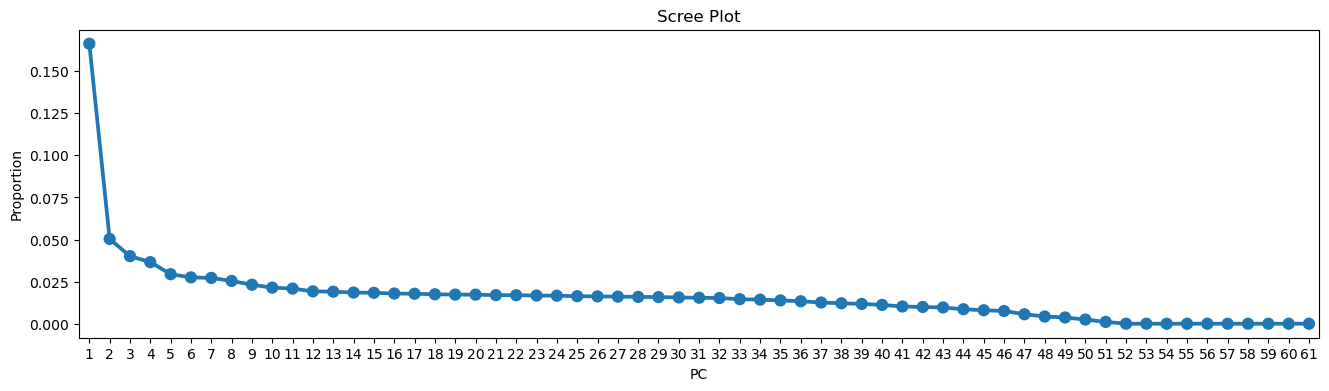

In [532]:
plt.figure(figsize=(16, 4))
sns.pointplot(
    x="PC", y="Proportion",
    data=variance_explained2
).set_title('Scree Plot')

In [533]:
pc_scores2 = pd.DataFrame(pc_scores2, columns=PC_LABELS2)

In [534]:
t2 = pc_scores2.iloc[:, :6]

In [535]:
test_pred = model2.predict(t2)

In [536]:
proba2 = model2.predict_proba(t2)

In [537]:
arr2 = np.asarray(proba2)
table2 = pd.DataFrame(arr2)

In [538]:
table2.rename(columns = {0 : 'Lower Cost', 1 : 'Low Cost', 2 : 'Normal Cost', 3: 'High Cost', 4: 'Higher Cost', 5 : 'Highest Cost'}, inplace=True)

In [539]:
tour_column = pd.read_csv('test_cleaned.csv')

In [540]:
final = tour_column['Tour_ID']

In [541]:
prob_final = pd.concat([final, table2], axis=1)

In [542]:
prob_final.to_csv("c\local_disk\class_project\submissionFile19.csv", index=False)

# model 3 (multi logistic)

In [564]:
new_features = pc_scores.iloc[:,:8]

In [565]:
z = train_file['cost_category']
z

0        0.422404
1        0.422404
2        1.150430
3       -1.761677
4        1.150430
           ...   
18473   -1.761677
18474   -1.761677
18475    1.150430
18476    1.150430
18477   -1.033650
Name: cost_category, Length: 18478, dtype: float64

In [566]:
X_train, X_test, y_train, y_test = train_test_split(new_features, z, test_size=0.2, random_state=12345)

In [579]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
9204,2.464926,0.887922,1.023403,1.414596,-0.777074,0.136765,1.088588,-1.378286
12691,-4.237543,-0.914815,-0.618420,-0.711080,-0.204918,0.496491,0.709631,-1.992493
2524,-4.383663,-1.717250,-1.291991,-1.667091,0.498455,1.779763,0.037628,1.014670
6525,1.996955,-0.382229,-0.145228,-1.060492,-1.714579,2.251988,-0.723580,-0.481906
349,5.485896,-2.842185,0.769156,-1.721394,1.163732,0.616161,-0.312008,0.027038
...,...,...,...,...,...,...,...,...
16930,4.095180,0.255876,-0.006171,3.620939,0.053911,-0.707741,-0.224227,0.104054
4094,5.313931,-0.412487,0.617721,-1.257035,-0.980720,0.876636,-0.277245,-1.018489
11689,-4.151161,-1.192156,-0.594215,-0.840794,-0.715178,-0.202257,0.969948,2.029100
2177,-5.127946,-1.538364,-2.204103,-0.837317,1.099076,-0.917722,1.752093,0.371505


In [569]:
X_test.shape

(3696, 8)

In [581]:
y_train = y_train.to_numpy()

In [575]:
clf = LogisticRegression(penalty='none', max_iter=1000)

In [583]:
probs = pd.DataFrame()

for number in range(10):
    y = 1*(y_train==number) # create binary outcome
    clf.fit(X=X_train, y=y) # fit the classifier on TRAINING SET
    probs[str(number)] = clf.predict_proba(X_test)[:,1] # get the estimated probabilities on TEST SET

probs.head()

/Users/jordankavishe/anaconda3/envs/ixperience/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0